In [43]:
import argparse
import glob
import multiprocessing as mp
import os
import time
import yaml
import pickle as pkl
import pandas as pd

def get_parser():
    parser = argparse.ArgumentParser(description='Testing')
    parser.add_argument('--config-file', type=str, default='configs/defualt_config.yaml', metavar= "FILE" ,help='path to config file')
    parser.add_argument("--output", type=str, help="Output path")
    return parser


def get_cfg(config_file):
    with open(config_file, 'r') as f:
        config = yaml.safe_load(f)
    return config

def update_dicts(default_dict, input_dict):
    for key, value in default_dict.items():
        if key in input_dict:
            if isinstance(value, dict) and isinstance(input_dict[key], dict):
                update_dicts(value, input_dict[key])  
            else:
                default_dict[key] = input_dict[key]  
    return default_dict

def merge_cfg(default_dict, input_dict):
    merged_dict = default_dict.copy()  # Start with default values.
    merged_dict = update_dicts(merged_dict, input_dict)  # Override with user-provided values.
    return merged_dict
    
    
def get_output_path(output_path, config_filename):
    if output_path is None:
        # output file will be a pickle file in the outputs folder
        output_path = os.path.join("outputs", config_filename.split("/")[-1].split(".")[0] + ".pkl")
    else:
        # output file will be a pickle file in the specified folder
        output_path = os.path.join(output_path, config_filename.split("/")[-1].split(".")[0] + ".pkl")
    return output_path    

In [2]:
!python testing.py --config-file configs/test_config_BMP.yaml 

{'MODEL': {'method': 'BMP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': True, 'signal_bag_percent': 0.7, 'atom_bag_percent': 0.7, 'select_atom_percent': 0, 'replace_flag': True, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0}, 'mse': 0.22617334430444358}
{'MODEL': {'method': 'BMP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': True, 'signal_bag_percent': 0.7, 'atom_bag_percent': 0.7, 'select_atom_percent': 0, 'replace_flag': True, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0.1}, 'mse': 0.3630720966957844}
{'MODEL': {'method': 'BMP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': True, 'signal_bag_percent': 0.7, 'atom_bag_percent': 0.7, 'select_atom_percent': 0, 'replace_flag': True, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0.2}, 'mse': 0.8061021686168154}
Done!
Results are saved in:  outputs/test_config_BMP.pkl


In [4]:
!python testing.py --config-file configs/test_config_BOMP.yaml 

Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix encountered in OMP
Singular matrix enco

In [6]:
!python testing.py --config-file configs/test_config_MP.yaml 

{'MODEL': {'method': 'MP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': False, 'signal_bag_percent': 0.7, 'atom_bag_percent': 1, 'select_atom_percent': 0, 'replace_flag': False, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0}, 'mse': 0.00012909723732306712}
{'MODEL': {'method': 'MP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': False, 'signal_bag_percent': 0.7, 'atom_bag_percent': 1, 'select_atom_percent': 0, 'replace_flag': False, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0.1}, 'mse': 0.49279528874164497}
{'MODEL': {'method': 'MP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': False, 'signal_bag_percent': 0.7, 'atom_bag_percent': 1, 'select_atom_percent': 0, 'replace_flag': False, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0.2}, 'mse': 1.970694251788879}
Done!
Results are saved in:  outputs/test_config_MP.pkl


In [39]:
# Revised AtomBaggingOrthogonalMatchingPursuit to avoid singular matrix
!python testing.py --config-file configs/test_config_OMP.yaml 

{'MODEL': {'method': 'OMP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': False, 'signal_bag_percent': 0.7, 'atom_bag_percent': 1, 'select_atom_percent': 0, 'replace_flag': False, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0}, 'mse': 1.175736065232345e-05}
{'MODEL': {'method': 'OMP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': False, 'signal_bag_percent': 0.7, 'atom_bag_percent': 1, 'select_atom_percent': 0, 'replace_flag': False, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0.1}, 'mse': 0.4956205592055881}
{'MODEL': {'method': 'OMP', 'bagging_sub_num': 10, 'depth': 100, 'signal_bag_flag': False, 'signal_bag_percent': 0.7, 'atom_bag_percent': 1, 'select_atom_percent': 0, 'replace_flag': False, 'agg_func': 'weight'}, 'TEST': {'N': 100000, 'd': 300, 'true_sparsity': 50, 'noise_level': 0.2}, 'mse': 1.981299777248519}
Done!
Results are saved in:  outputs/test_config_OMP.pkl


In [11]:
def process_dict(dictionary, prefix='', result=None):
    if result is None:
        result = {}
    for key, value in dictionary.items():
        if isinstance(value, dict):
            process_dict(value, prefix + key + '_', result)
        else:
            result[prefix + key] = value
    return result

In [40]:
methods = ['MP', 'OMP', 'BMP', 'BOMP']
performance_all = []
for method in methods:
    output_name = 'outputs/test_config_' + method + '.pkl'
    performances = pkl.load(open(output_name, "rb"))
    for performance in performances:
        performance = process_dict(performance)
        performance_all.append(performance)

In [41]:
pd.DataFrame(performance_all)

,MODEL_method,MODEL_bagging_sub_num,MODEL_depth,MODEL_signal_bag_flag,MODEL_signal_bag_percent,MODEL_atom_bag_percent,MODEL_select_atom_percent,MODEL_replace_flag,MODEL_agg_func,TEST_N,TEST_d,TEST_true_sparsity,TEST_noise_level,mse
0,MP,10,100,False,0.7,1.0,0,False,weight,100000,300,50,0.0,0.000129
1,MP,10,100,False,0.7,1.0,0,False,weight,100000,300,50,0.1,0.492795
2,MP,10,100,False,0.7,1.0,0,False,weight,100000,300,50,0.2,1.970694
3,OMP,10,100,False,0.7,1.0,0,False,weight,100000,300,50,0.0,0.000012
4,OMP,10,100,False,0.7,1.0,0,False,weight,100000,300,50,0.1,0.495621
5,OMP,10,100,False,0.7,1.0,0,False,weight,100000,300,50,0.2,1.981300
6,BMP,10,100,True,0.7,0.7,0,True,weight,100000,300,50,0.0,0.226173
7,BMP,10,100,True,0.7,0.7,0,True,weight,100000,300,50,0.1,0.363072
8,BMP,10,100,True,0.7,0.7,0,True,weight,100000,300,50,0.2,0.806102
9,BOMP,10,100,True,0.7,0.7,0,True,weight,100000,300,50,0.0,0.166409


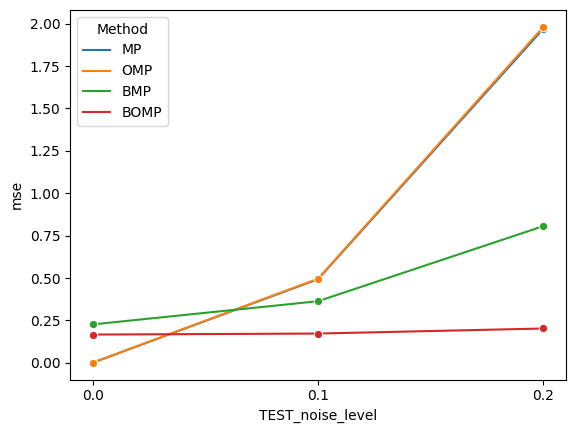

In [42]:
# Visualization
performance_all = pd.DataFrame(performance_all)

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=performance_all, x="TEST_noise_level", y="mse", hue="MODEL_method", marker="o")

plt.xticks(performance_all['TEST_noise_level'].unique())

plt.legend(title="Method")

plt.show()